{'res': array([[  3.33868000e+08]], dtype=float32)}
333868000.0 333868000.0 (0, 0) (0, 0)


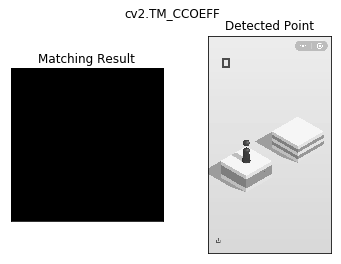

{'res': array([[ 0.47775081]], dtype=float32)}
0.4777508080005646 0.4777508080005646 (0, 0) (0, 0)


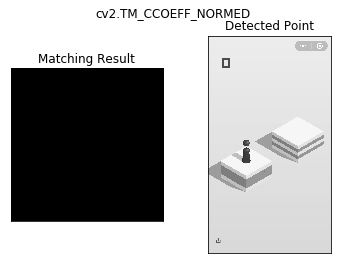

{'res': array([[  1.16883300e+11]], dtype=float32)}
116883300352.0 116883300352.0 (0, 0) (0, 0)


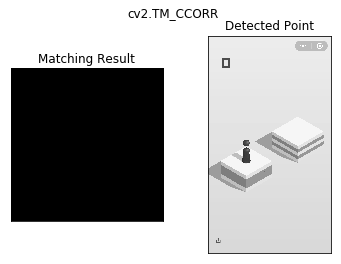

{'res': array([[ 0.99551755]], dtype=float32)}
0.9955175518989563 0.9955175518989563 (0, 0) (0, 0)


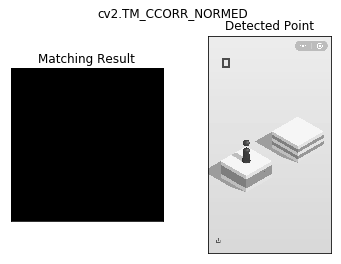

{'res': array([[  3.13081600e+09]], dtype=float32)}
3130816000.0 3130816000.0 (0, 0) (0, 0)


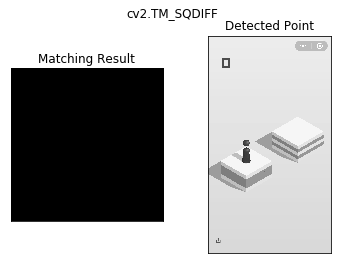

{'res': array([[ 0.02666576]], dtype=float32)}
0.026665763929486275 0.026665763929486275 (0, 0) (0, 0)


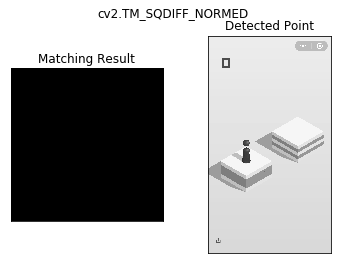

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan  7 19:11:19 2018

@author: liujun
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('chess_all.png',0)
img2 = img.copy()
template = cv2.imread('chess2.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    print({'res':res})
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, max_val, min_loc, max_loc )

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()